# Analyzing the `.log` files 

In [1]:
import pandas as pd
import numpy as np

In [2]:
n_cores = np.array([20, 20, 24, 24, 24, 24, 32, 32, 32, 36, 36, 40, 40, 48, 48, 48, 50, 64, 64, 64, 64, 72, 72])
n_mpiprocs = np.array([10, 4, 24, 12, 6, 4, 16, 8, 4, 18, 6, 20, 10, 12, 8, 6, 10, 32, 16, 8, 4, 36, 18])
ns_per_day = np.array([29.248, 28.817, 33.090, 34.535, 34.427, 34.128, 16.624, 42.117, 40.520, 49.069, 43.465, 51.405, 47.407, 18.847, 54.970, 55.032, 19.090, 67.691, 71.951, 66.994, 62.660, 75.193, 70.807])
hours_per_ns = np.array([0.821, 0.833, 0.725, 0.695, 0.697, 0.703, 1.444, 0.570, 0.592, 0.489, 0.552, 0.467, 0.506, 1.273, 0.437, 0.436, 1.257, 0.355, 0.334, 0.358, 0.383, 0.319, 0.339])

In [3]:
# Posso fare un plot in cui ad ogni punto associo una coppia

d = {'ncpus': n_cores, 'mpiprocs': n_mpiprocs, 'ns/day': ns_per_day, 'hours/ns': hours_per_ns}
df = pd.DataFrame(data=d)
df

,ncpus,mpiprocs,ns/day,hours/ns
0,20,10,29.248,0.821
1,20,4,28.817,0.833
2,24,24,33.090,0.725
3,24,12,34.535,0.695
4,24,6,34.427,0.697
5,24,4,34.128,0.703
6,32,16,16.624,1.444
7,32,8,42.117,0.570
8,32,4,40.520,0.592
9,36,18,49.069,0.489


In [7]:
#specify path for export
path = "/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_nmRec/nmRec_without_bias.txt"
#export DataFrame to text file
with open(path, 'a') as f:
    df_string = df.to_string(header=False, index=False)
    f.write(df_string)

In [4]:
import matplotlib.pyplot as plt

In [5]:
z = []
for i in range(len(n_cores)):
    z.append('(' + str(n_cores[i]) + ', ' + str(n_mpiprocs[i]) + ')')

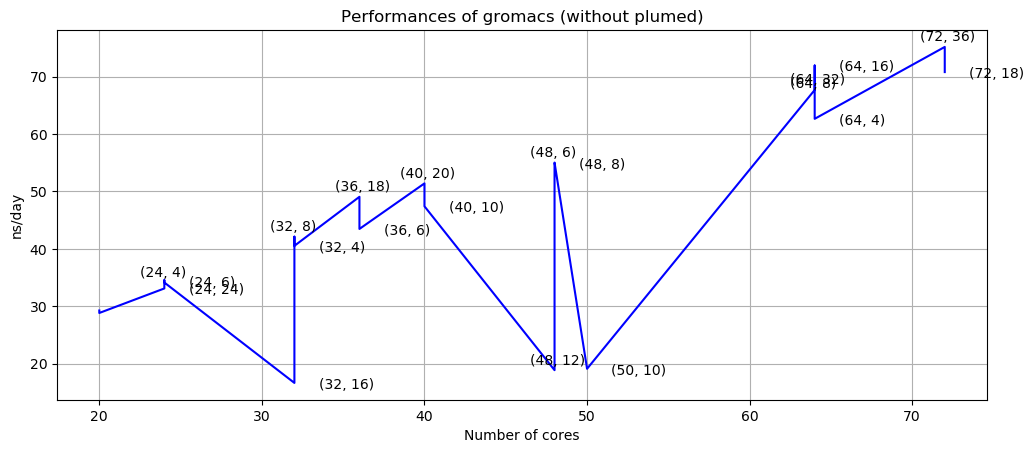

In [10]:
plt.figure().set_figwidth(12)
plt.plot(df["ncpus"], df["ns/day"], 'b')

for i in range(2, len(n_mpiprocs), 2):
    plt.text(df["ncpus"][i] + 1.5, df["ns/day"][i] - 1, z[i])
# qua puoi aggiungerci le labels e allungare il plot 

for i in range(5, len(n_mpiprocs), 2):
    plt.text(df["ncpus"][i] - 1.5, df["ns/day"][i] + 1, z[i])

plt.grid()
plt.xlabel("Number of cores")
plt.ylabel("ns/day")
plt.title("Performances of gromacs (without plumed)")
plt.savefig("/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_nmRec/performance_without_bias.png")